In [ ]:
#  Niko Sarcevic
#  nikolina.sarcevic@gmail.com
#  github.com/nikosarcevic

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import srd_redshift_distributions as srd
import yaml

Use this example notebook to generate the LSST DESC SRD-like lens and source distributions
for year 1 and year 10. This notebook calls the get_redshift_distribution() function 
that generates the desired redshift distribution for a given redshift range. 
For more information about the parametrisation used, call the help function
or consult the LSST DESC Science Requirement Document (SRD) https://arxiv.org/abs/1809.01669.

In [3]:
#help(srd.SRD)  # uncomment to get more info

# Obtain the SRD redshift distributions

An example on how to generate the SRD source- and lens-like redshift distributions (Smail-type parametrisation) for an appropriate forecast year.
The function will output the redshift distribution. The redshift distribution will be normalised by default. This can be omitted by setting the normalisation argument to False. 
There is also a default setting to automatically save the redshfit range and the redshift distribution to a .csv file. If you do not wish to export the result to file, change the argument save_file to False.

In [ ]:
# You can generate the desired redshfit distribution
# by specifying the galaxy sample and forecast year only.
# This way you will be calling the LSST DESC defaults for
# the redshfit interval. Distribution will be noramlised
# and the output file will be generated by default.
# Uncomment below to test.
# lenses_y1 = srd.SRD(galaxy_sample="lens_sample", forecast_year="1").get_redshift_distribution()

In [6]:
# Define the redshift interval
redshift_range = np.linspace(0.01, 4., 400)  # this is the LSST default redshift range


# Generate the SRD lens and source samples (normalised)
# for forecast years 1 and 10
lenses_y1 = srd.SRD(galaxy_sample="lens_sample", 
                    forecast_year="1").get_redshift_distribution(redshift_range,
                                                                 normalised=True,
                                                                 save_file=True)

lenses_y10 = srd.SRD(galaxy_sample="lens_sample",
                     forecast_year="10").get_redshift_distribution(redshift_range,
                                                                   normalised=True,
                                                                   save_file=True)

sources_y1 = srd.SRD(galaxy_sample="source_sample",
                     forecast_year="1").get_redshift_distribution(redshift_range,
                                                                  normalised=True,
                                                                  save_file=True)

sources_y10 = srd.SRD(galaxy_sample="source_sample",
                      forecast_year="10").get_redshift_distribution(redshift_range,
                                                                    normalised=True,
                                                                    save_file=True)

# Plot the distributions

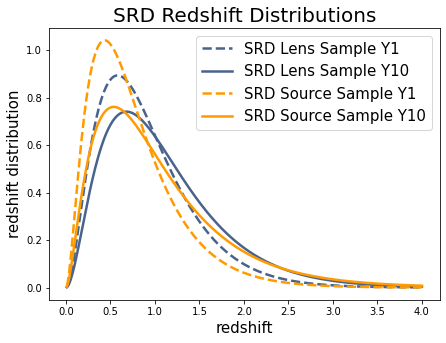

In [11]:
fig = plt.figure(figsize=(7,5))
plt.rcParams['lines.linewidth'] = 2.5
dutchblue = "#4A638d"
dutchorange = "#FF9B00"

plt.plot(redshift_range, 
         lenses_y1, 
         label="SRD Lens Sample Y1",
         ls="--",
         color=dutchblue)
plt.plot(redshift_range, 
         lenses_y10, 
         label="SRD Lens Sample Y10",
         c=dutchblue)
plt.plot(redshift_range, 
         sources_y1, 
         label="SRD Source Sample Y1",
         ls="--",
         c=dutchorange)
plt.plot(redshift_range, 
         sources_y10, 
         label="SRD Source Sample Y10",
         c=dutchorange)

plt.xlabel("redshift", fontsize=15)
plt.ylabel("redshift distribution", fontsize=15)
plt.title("SRD Redshift Distributions", fontsize=20)
plt.legend(fontsize=15)
plt.savefig("SRD_dndz_normalised.pdf")

# Unnormalised redshift distributions

In [8]:
# Generate the SRD lens and source samples (unnormalised)
lenses_y1_unnorm = srd.SRD(galaxy_sample="lens_sample", 
                    forecast_year="1").get_redshift_distribution(redshift_range,
                                                                 normalised=False,
                                                                 save_file=False)

lenses_y10_unnorm = srd.SRD(galaxy_sample="lens_sample",
                     forecast_year="10").get_redshift_distribution(redshift_range,
                                                                   normalised=False,
                                                                   save_file=False)

sources_y1_unnorm = srd.SRD(galaxy_sample="source_sample",
                     forecast_year="1").get_redshift_distribution(redshift_range,
                                                                  normalised=False,
                                                                  save_file=False)

sources_y10_unnorm = srd.SRD(galaxy_sample="source_sample",
                      forecast_year="10").get_redshift_distribution(redshift_range,
                                                                    normalised=False,
                                                                    save_file=False)

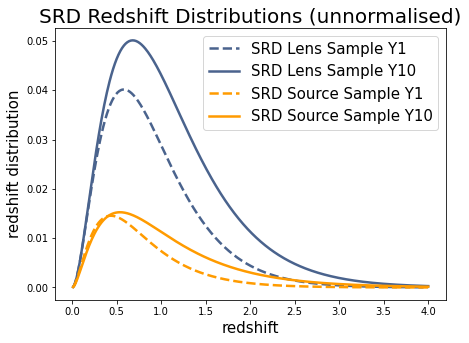

In [12]:
fig = plt.figure(figsize=(7,5))
plt.rcParams['lines.linewidth'] = 2.5
dutchblue = "#4A638d"
dutchorange = "#FF9B00"

plt.plot(redshift_range, 
         lenses_y1_unnorm, 
         label="SRD Lens Sample Y1",
         ls="--",
         color=dutchblue)
plt.plot(redshift_range, 
         lenses_y10_unnorm, 
         label="SRD Lens Sample Y10",
         c=dutchblue)
plt.plot(redshift_range, 
         sources_y1_unnorm, 
         label="SRD Source Sample Y1",
         ls="--",
         c=dutchorange)
plt.plot(redshift_range, 
         sources_y10_unnorm, 
         label="SRD Source Sample Y10",
         c=dutchorange)

plt.xlabel("redshift", fontsize=15)
plt.ylabel("redshift distribution", fontsize=15)
plt.title("SRD Redshift Distributions (unnormalised)", fontsize=20)
plt.legend(fontsize=15)
plt.savefig("SRD_dndz_unnormalised.pdf")